In [ ]:
%%bash
zcat ../../data/annotation_table_rho.txt.gz \
|grep -v "^#" \
| awk '{print $(NF-0)}' \
|sort -n - \
|uniq -c >rho_counts.txt

In [2]:
import os
os.chdir('../../data/diversity/')

In [3]:
import pandas as pd
rho_df = pd.read_table('rho_counts.txt', sep="\s", na_values=".", names=['count', 'rho'])
rho_df.head()

print(rho_df.rho.min(), rho_df.rho.max())



6.3108e-07 6.7512


/home/hasans11/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


based on figure 1 the vast majority of windows are done by 0.06

so lets go 50 windows from 0 to 0.06

In [4]:
bins = [(i/1000, i/1000 + 1/1000) for i in range(61)]

r_hist  = {}
for b in bins:
    r_hist[b] = {'sites':0, 'COs':0}
    

for l in open('rho_counts.txt'):
    try:
        site_count, rho = int(l.strip().split()[0]), float(l.strip().split()[1])
    except:
        print(l)
        continue
    for b in bins:
        if  b[0] <= rho < b[1]:
            r_hist[b]['sites'] += site_count
            break

            

In [12]:
for l in open("all_break_points_rho.txt"):
    if not l.startswith('cross'):
        rho = float(l.strip().split(',')[-1])
        for b in bins:
            if  b[0] <= rho < b[1]:
                r_hist[b]['COs'] += 1
                break

In [13]:
r_hist

{(0.0, 0.001): {'COs': 250, 'sites': 45617907},
 (0.001, 0.002): {'COs': 212, 'sites': 17124124},
 (0.002, 0.003): {'COs': 229, 'sites': 11214393},
 (0.003, 0.004): {'COs': 188, 'sites': 7911355},
 (0.004, 0.005): {'COs': 170, 'sites': 5803738},
 (0.005, 0.006): {'COs': 63, 'sites': 4327625},
 (0.006, 0.007): {'COs': 54, 'sites': 3003386},
 (0.007, 0.008): {'COs': 62, 'sites': 2443101},
 (0.008, 0.009000000000000001): {'COs': 42, 'sites': 1997086},
 (0.009, 0.009999999999999998): {'COs': 28, 'sites': 1424315},
 (0.01, 0.011): {'COs': 36, 'sites': 987700},
 (0.011, 0.012): {'COs': 20, 'sites': 1219733},
 (0.012, 0.013000000000000001): {'COs': 22, 'sites': 697423},
 (0.013, 0.013999999999999999): {'COs': 13, 'sites': 480972},
 (0.014, 0.015): {'COs': 24, 'sites': 685824},
 (0.015, 0.016): {'COs': 11, 'sites': 383081},
 (0.016, 0.017): {'COs': 27, 'sites': 606670},
 (0.017, 0.018000000000000002): {'COs': 22, 'sites': 281018},
 (0.018, 0.019): {'COs': 15, 'sites': 200973},
 (0.019, 0.02): 

/home/hasans11/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


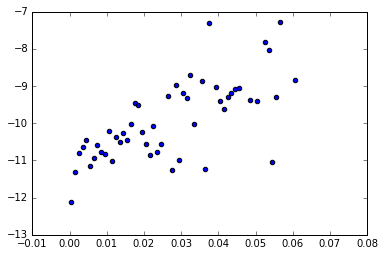

In [15]:

import matplotlib.pyplot
import pylab
import numpy as np 

mid_x = [(b[1] + b[0])/2 for b in bins if r_hist[b]['sites'] >0]
CO_density =  [r_hist[b]['COs']/r_hist[b]['sites'] for b in bins if r_hist[b]['sites'] >0 ]

CO_density

matplotlib.pyplot.scatter(mid_x,np.log(CO_density))


In [16]:
rho_midpoints = [(b[0]+b[1])/2 for b in bins ]
COs = [r_hist[b]['COs'] for b in bins]
CO_density =  [r_hist[b]['COs']/r_hist[b]['sites'] for b in bins]
sites = [r_hist[b]['sites'] for b in bins]


df = pd.DataFrame.from_dict({'rho_midpoints':rho_midpoints,
                             "COs": COs,
                             "CO_density":CO_density,
                             "sites":sites,
                             "bins":bins
                            })

df['log_CO_density'] = np.log(df.CO_density+1)

In [17]:
df

,CO_density,COs,bins,rho_midpoints,sites,log_CO_density
0,0.000005,250,"(0.0, 0.001)",0.0005,45617907,0.000005
1,0.000012,212,"(0.001, 0.002)",0.0015,17124124,0.000012
2,0.000020,229,"(0.002, 0.003)",0.0025,11214393,0.000020
3,0.000024,188,"(0.003, 0.004)",0.0035,7911355,0.000024
4,0.000029,170,"(0.004, 0.005)",0.0045,5803738,0.000029
5,0.000015,63,"(0.005, 0.006)",0.0055,4327625,0.000015
6,0.000018,54,"(0.006, 0.007)",0.0065,3003386,0.000018
7,0.000025,62,"(0.007, 0.008)",0.0075,2443101,0.000025
8,0.000021,42,"(0.008, 0.009000000000000001)",0.0085,1997086,0.000021
9,0.000020,28,"(0.009, 0.009999999999999998)",0.0095,1424315,0.000020


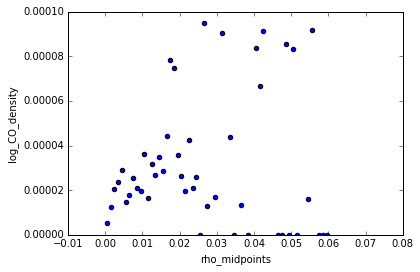

In [18]:
df.plot(kind='scatter', x='rho_midpoints', y='log_CO_density', ylim=(0, 0.0001) )

Correlation:  0.326863011159
(0.3268630111594743, 0.010137213715728817)


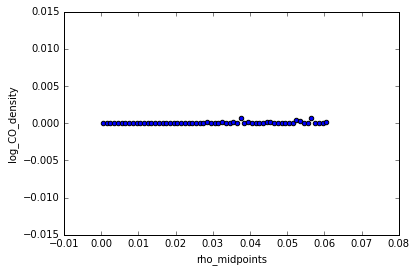

In [19]:
import scipy.stats  as stats

#df_filter = df[(df.sites>500000)]
df_filter = df[df.COs >0]
df_filter = df
df_filter.plot(kind='scatter',x='rho_midpoints',y='log_CO_density')
print("Correlation: ", df_filter.rho_midpoints.corr(df_filter.CO_density))
fit  = stats.pearsonr(df_filter['rho_midpoints'], df_filter['CO_density'])
print(fit)
#df_filter

In [20]:
df.to_csv("rho_to_CO_density.txt")

In [21]:
df.dropna()

,CO_density,COs,bins,rho_midpoints,sites,log_CO_density
0,0.000005,250,"(0.0, 0.001)",0.0005,45617907,0.000005
1,0.000012,212,"(0.001, 0.002)",0.0015,17124124,0.000012
2,0.000020,229,"(0.002, 0.003)",0.0025,11214393,0.000020
3,0.000024,188,"(0.003, 0.004)",0.0035,7911355,0.000024
4,0.000029,170,"(0.004, 0.005)",0.0045,5803738,0.000029
5,0.000015,63,"(0.005, 0.006)",0.0055,4327625,0.000015
6,0.000018,54,"(0.006, 0.007)",0.0065,3003386,0.000018
7,0.000025,62,"(0.007, 0.008)",0.0075,2443101,0.000025
8,0.000021,42,"(0.008, 0.009000000000000001)",0.0085,1997086,0.000021
9,0.000020,28,"(0.009, 0.009999999999999998)",0.0095,1424315,0.000020
